# $f(x,y) = x^2y+xy;x\geq -1/3$

* Satisfies $\alpha-MVI$ for large $\alpha$ : Condition $x^2y+\alpha(x^2(x+1)(2x+1)+y^2(2x+1)^2) \geq 0
$.
* Does not satisfy MVI ($\alpha$=0).

In [1]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib import patches

In [4]:
import numpy as np

In [5]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [6]:
def oracle(x,y,a):
    gx = 2*x*y+y
    gy = x*x+x
    gxy = 2*x+1
    gax = (gx+a*gxy*gy)/(1+a**2)
    gay = (-gy+a*gxy*gx)/(1+a**2)
    return([gx,gy,gax,gay])

In [7]:
def SimGD(x,y,n):
    xs = []
    ys = []
    x=x
    y=y
    k=2
    a= 0
    for i in range(300):
        [gx,gy,gax,gay] = oracle(x,y,a)
        y = y-n*gy
        x = x-n*gx
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [8]:
def CGD_plus(x,y,a,n):
    xs = [x]
    ys = [y]
    a = a
    for i in range(300):
        #x-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        y = y-n*gay
        x = x-n*gax
        if x<= -1.0/3:
            x=-1.0/3
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [26]:
def unP_CGD_plus(x,y,a,n):
    xs = [x]
    ys = [y]
    a = a
    for i in range(300):
        #x-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        y = y-n*gay
        x = x-n*gax
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [57]:
def unP_OptCGD_plus(x,y,a,n):
    xs = []
    ys = []
    x=x
    y=y
    a = a
    for i in range(300):
        x_temp = x
        y_temp = y
        
        #x-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        x = x-n*gax
        y = y-n*gay
        #y-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        x = x_temp-n*gax
        y = y_temp-n*gay        
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [10]:
def OptCGD_plus(x,y,a,n):
    xs = [x]
    ys = [y]
    x=x
    y=y
    a = a
    for i in range(800):
        x_temp = x
        y_temp = y
        
        #x-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        x = x-n*gax
        y = y-n*gay
        if x<= -1.0/3:
            x=-1.0/3
        #y-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        x = x_temp-n*gax
        y = y_temp-n*gay        
        if x<= -1.0/3:
            x=-1.0/3
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [11]:
def plot_negative_gradients(a=0) -> None:
    fig, ax = plt.subplots(figsize=(10, 10))
    k=2
    x, y = np.mgrid[-5:5:20j, -5:5:20j]
    gx = k*x-y
    gy = -k*y-x
    gxy = -1
    gax = (gx+a*gxy*gy)/(1+a**2)
    gay = (gy-a*gxy*gx)/(1+a**2)    
    
    norm = np.linalg.norm(np.stack([gx, gy], axis=0), axis=0)
    plt.quiver(x, y, -gax, gay, norm, width=0.002,scale = 100)

    rect = patches.Rectangle((-1, -0.1), 2, 0.2, linewidth=2, edgecolor="r", facecolor="none")
#     ax.add_patch(rect)

    plt.xlabel(r"$x$",fontsize=40)
    plt.ylabel(r"$y$",fontsize=40)
#     plt.title("$-∇f(x, y) = -8y+6sin(x)^2sin(y)cos(y)-20sin(y)cos(y)$")
    plt.xticks(range(-5, 6),size = 20)
    plt.yticks(range(-5, 6),size = 20)
    plt.axis("equal")
    plt.tight_layout()

#     plt.savefig("out/negative_gradients_1.png")
#     plt.close()


# Projected Versions 

## CGO

0
1
2
3


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x0000023CF63EC588> has a label of '_nolegend_' which cannot be automatically added to the legend.


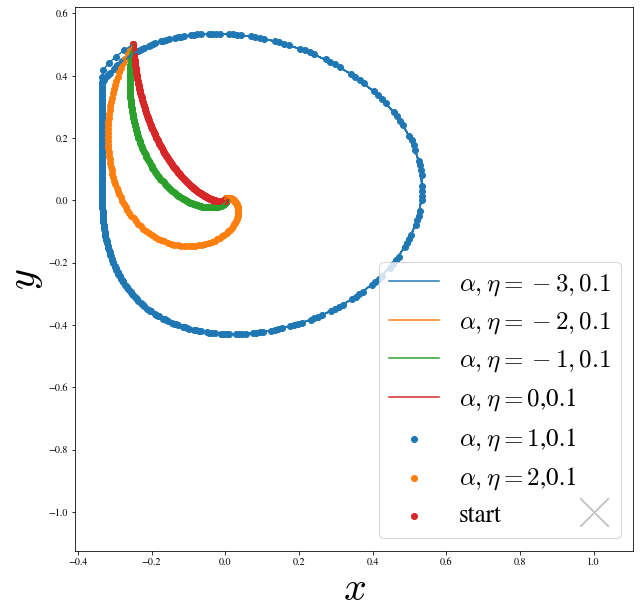

In [47]:
# plot_negative_gradients()
plt.figure(figsize=(10,10))

for i in range(0,4):
    a,b = CGD_plus(-0.25,0.5,(i),0.1)
    print((i))
    plt.scatter(a,b)
    plt.plot(a,b)
plt.scatter(1,-1,marker='x',c='black',s=800)
plt.scatter(1,-1,marker='x',c='black',s=800)
plt.scatter(1,-1,marker='x',c='black',s=800)
plt.scatter(1,-1,marker='x',c='black',s=800)
plt.scatter(1,-1,marker='x',c='black',s=800)
plt.scatter(1,-1,marker='x',c='black',s=800)
hfont = {'fontname':'Times New Roman'}
plt.xlabel(r"$x$",fontsize=40)
plt.ylabel(r"$y$",fontsize=40)
plt.legend([r"$\alpha,\eta=-3,0.1$", r"$\alpha,\eta=-2,0.1$",r"$\alpha,\eta=-1,0.1$",r"$\alpha,\eta=0$,0.1", r"$\alpha,\eta=1$,0.1",r"$\alpha,\eta=2$,0.1","_nolegend_","start"], loc ="lower right",prop={'size': 25})
plt.savefig('cgdp+Nf.pdf', format='pdf')

## oCGO

0.0
0.5
1.0
1.5
2.0
2.5


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x0000023CF5BDA748> has a label of '_nolegend_' which cannot be automatically added to the legend.


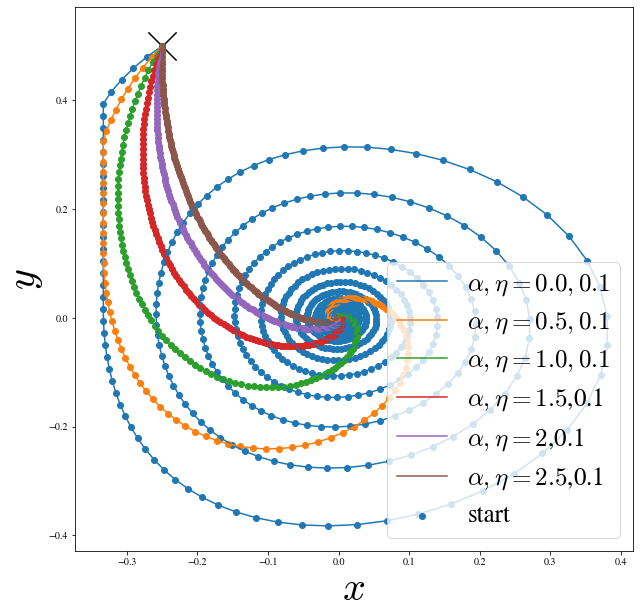

In [60]:
plt.figure(figsize=(10.,10))
# plot_negative_gradients()
plt.scatter(-0.25,0.5,marker='x',c='black',s=800)
for i in np.arange(0,3,0.5):
    if i<=0:
        a,b = OptCGD_plus(-0.25,0.5,(i),0.1)
    else:
        a,b = OptCGD_plus(-0.25,0.5,(i),0.1)
    print((i))
    plt.scatter(a,b)
    plt.plot(a,b)

plt.xlabel(r"$x$",fontsize=40)
plt.ylabel(r"$y$",fontsize=40)


plt.legend([r"$\alpha,\eta=0.0,0.1$", r"$\alpha,\eta=0.5,0.1$",r"$\alpha,\eta=1.0,0.1$",r"$\alpha,\eta=1.5$,0.1", r"$\alpha,\eta=2$,0.1",r"$\alpha,\eta=2.5$,0.1","_nolegend_","start"], loc ="lower right",prop={'size': 25})
plt.savefig('ocgdp+Nf.pdf', format='pdf')

# Unprojected Variants

## Unprojected CGO

0
1
2
3


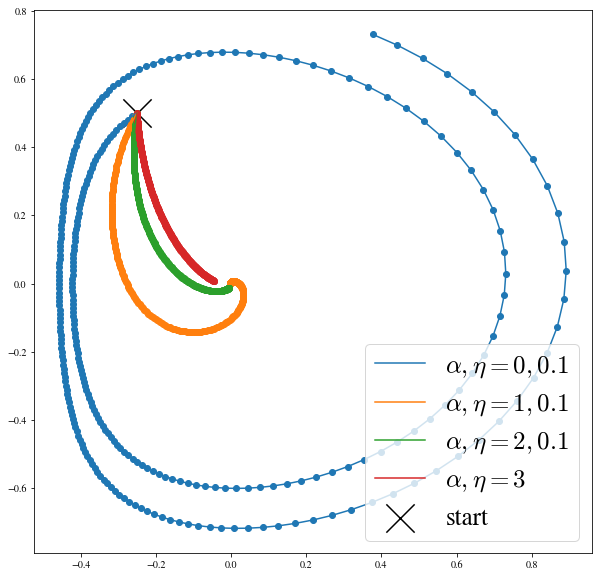

In [66]:
# plot_negative_gradients()
plt.figure(figsize=(10,10))
plt.scatter(-0.25,0.5,marker='x',c='black',s=800)

for i in range(0,4):
    if i<=0:
        a,b = unP_CGD_plus(-0.25,0.5,(i),0.05)
    else:
        a,b = unP_CGD_plus(-0.25,0.5,(i),0.05)
    print((i))
    plt.scatter(a,b)
    plt.plot(a,b)

hfont = {'fontname':'Times New Roman'}
# plt.xlabel("x",fontsize = 40,**hfont)
# plt.ylabel("y",fontsize = 40,**hfont)
plt.legend([r"$\alpha,\eta=0,0.1$", r"$\alpha,\eta=1,0.1$",r"$\alpha,\eta=2,0.1$",r"$\alpha,\eta=3$","start"], loc ="lower right",prop={'size': 25})
plt.savefig('cgdp+f.pdf', format='pdf')

## Unprojected oCGO

0
1
2
3


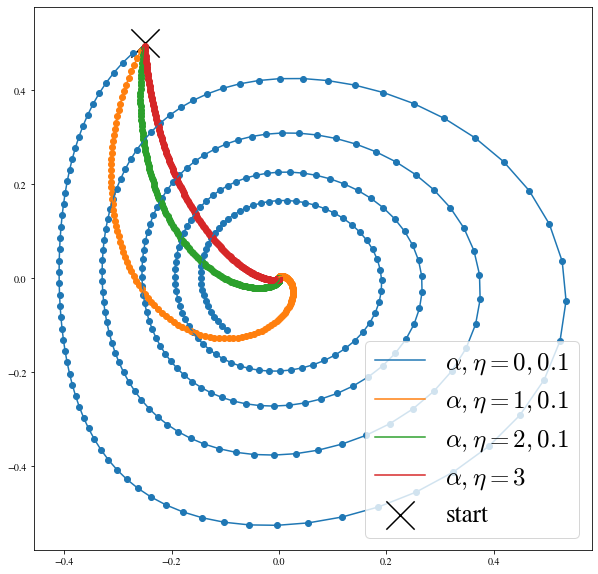

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(-0.25,0.5,marker='x',c='black',s=800)

for i in range(0,4):
    if i<=0:
        a,b = unP_OptCGD_plus(-0.25,0.5,(i),0.1)
    else:
        a,b = unP_OptCGD_plus(-0.25,0.5,(i),0.1)
    print((i))
    plt.scatter(a,b)
    plt.plot(a,b)

hfont = {'fontname':'Times New Roman'}
plt.legend([r"$\alpha,\eta=0,0.1$", r"$\alpha,\eta=1,0.1$",r"$\alpha,\eta=2,0.1$",r"$\alpha,\eta=3$","start"], loc ="lower right",prop={'size': 25})
plt.savefig('cgdp+f.pdf', format='pdf')